# [DataCamp Course](https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python)

## Generate a Classification-tree in scikit-learn

In [1]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#Import train_test_split
from sklearn.model_selection import train_test_split
#Import accuracy_score
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
url = 'indian_liver_patient_preprocessed.csv'
data = pd.read_csv(url, index_col=0)

In [3]:
data.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [4]:
X = data.drop(labels=['Total_Bilirubin_std',
                      'Liver_disease',
                     'Direct_Bilirubin_std',
                     'Alkaline_Phosphotase_std',
                     'Alamine_Aminotransferase_std',
                     'Aspartate_Aminotransferase_std',
                     'Albumin_std',
                     'Albumin_and_Globulin_Ratio_std',
                     'Is_male_std'], axis=1)
y = data.Liver_disease

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_std             579 non-null    float64
 1   Total_Protiens_std  579 non-null    float64
dtypes: float64(2)
memory usage: 13.6 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)

In [7]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [8]:
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.6724137931034483

## Decision Regions
region in the feature space where all instances are assigned to one class label
## Decision Boundary
surface separating different decision regions

In [9]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 1 1]


In [10]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.66


## Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

In [11]:
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
                              """Plot decision regions of a classifier.
                          
                              Please note that this functions assumes that class labels are
                              labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
                              labels with integer labels > 4, you may want to provide additional colors
                              and/or markers as `colors` and `markers` arguments.
                              See http://matplotlib.org/examples/color/named_colors.html for more
                              information.
                          
                              Parameters
                              ----------
                              X : array-like, shape = [n_samples, n_features]
                                  Feature Matrix.
                              y : array-like, shape = [n_samples]
                                  True class labels.
                              clf : Classifier object.
                                  Must have a .predict method.
                              feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
                                  Feature indices to use for plotting. The first index in
                                  `feature_index` will be on the x-axis, the second index will be
                                  on the y-axis.
                              filler_feature_values : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted.
                              filler_feature_ranges : dict (default: None)
                                  Only needed for number features > 2. Dictionary of feature
                                  index-value pairs for the features not being plotted. Will use the
                                  ranges provided to select training samples for plotting.
                              ax : matplotlib.axes.Axes (default: None)
                                  An existing matplotlib Axes. Creates
                                  one if ax=None.
                              X_highlight : array-like, shape = [n_samples, n_features] (default: None)
                                  An array with data points that are used to highlight samples in `X`.
                              res : float or array-like, shape = (2,) (default: 0.02)
                                  Grid width. If float, same resolution is used for both the x- and
                                  y-axis. If array-like, the first item is used on the x-axis, the
                                  second is used on the y-axis. Lower values increase the resolution but
                                  slow down the plotting.
                              hide_spines : bool (default: True)
                                  Hide axis spines if True.
                              legend : int (default: 1)
                                  Integer to specify the legend location.
                                  No legend if legend is 0.
                              markers : str (default \'s^oxv<>\')
                                  Scatterplot markers.
                              colors : str (default \'red,blue,limegreen,gray,cyan\')
                                  Comma separated list of colors.
                          
                              Returns
                              ---------
                              ax : matplotlib.axes.Axes object
                          
                              """
                          
                              # check_Xy(X, y, y_int=True)  # Validate X and y arrays
                              dim = X.shape[1]
                          
                              if ax is None:
                                  ax = plt.gca()
                          
                              if isinstance(res, float):
                                  xres, yres = res, res
                              else:
                                  try:
                                      xres, yres = res
                                  except ValueError:
                                      raise ValueError('Unable to unpack res. Expecting \
                                                       array-like input of length 2.')
                          
                              plot_testdata = True
                              if not isinstance(X_highlight, np.ndarray):
                                  if X_highlight is not None:
                                      raise ValueError('X_highlight must be a NumPy array or None')
                                  else:
                                      plot_testdata = False
                              elif len(X_highlight.shape) < 2:
                                  raise ValueError('X_highlight must be a 2D array')
                          
                              if feature_index is not None:
                                  # Unpack and validate the feature_index values
                                  if dim == 1:
                                      raise ValueError(
                                          'feature_index requires more than one training feature')
                                  try:
                                      x_index, y_index = feature_index
                                  except ValueError:
                                      raise ValueError(
                                          'Unable to unpack feature_index. Make sure feature_index \
                                          only has two dimensions.')
                                  try:
                                      X[:, x_index], X[:, y_index]
                                  except IndexError:
                                      raise IndexError(
                                          'feature_index values out of range. X.shape is {}, but \
                                          feature_index is {}'.format(X.shape, feature_index))
                              else:
                                  feature_index = (0, 1)
                                  x_index, y_index = feature_index
                          
                              # Extra input validation for higher number of training features
                              if dim > 2:
                                  if filler_feature_values is None:
                                      raise ValueError('Filler values must be provided when \
                                                       X has more than 2 training features.')
                          
                                  if filler_feature_ranges is not None:
                                      if not set(filler_feature_values) == set(filler_feature_ranges):
                                          raise ValueError(
                                              'filler_feature_values and filler_feature_ranges must \
                                              have the same keys')
                          
                                  # Check that all columns in X are accounted for
                                  column_check = np.zeros(dim, dtype=bool)
                                  for idx in filler_feature_values:
                                      column_check[idx] = True
                                  for idx in feature_index:
                                      column_check[idx] = True
                                  if not all(column_check):
                                      missing_cols = np.argwhere(~column_check).flatten()
                                      raise ValueError(
                                          'Column(s) {} need to be accounted for in either \
                                          feature_index or filler_feature_values'.format(missing_cols))
                          
                              marker_gen = cycle(list(markers))
                          
                              n_classes = np.unique(y).shape[0]
                              colors = colors.split(',')
                              colors_gen = cycle(colors)
                              colors = [next(colors_gen) for c in range(n_classes)]
                          
                              # Get minimum and maximum
                              x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
                              if dim == 1:
                                  y_min, y_max = -1, 1
                              else:
                                  y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1
                          
                              xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                                                   np.arange(y_min, y_max, yres))
                          
                              if dim == 1:
                                  X_predict = np.array([xx.ravel()]).T
                              else:
                                  X_grid = np.array([xx.ravel(), yy.ravel()]).T
                                  X_predict = np.zeros((X_grid.shape[0], dim))
                                  X_predict[:, x_index] = X_grid[:, 0]
                                  X_predict[:, y_index] = X_grid[:, 1]
                                  if dim > 2:
                                      for feature_idx in filler_feature_values:
                                          X_predict[:, feature_idx] = filler_feature_values[feature_idx]
                              Z = clf.predict(X_predict)
                              Z = Z.reshape(xx.shape)
                              # Plot decisoin region
                              ax.contourf(xx, yy, Z,
                                          alpha=0.3,
                                          colors=colors,
                                          levels=np.arange(Z.max() + 2) - 0.5)
                          
                              ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
                          
                              # Scatter training data samples
                              for idx, c in enumerate(np.unique(y)):
                                  if dim == 1:
                                      y_data = [0 for i in X[y == c]]
                                      x_data = X[y == c]
                                  elif dim == 2:
                                      y_data = X[y == c, y_index]
                                      x_data = X[y == c, x_index]
                                  elif dim > 2 and filler_feature_ranges is not None:
                                      class_mask = y == c
                                      feature_range_mask = get_feature_range_mask(
                                                      X, filler_feature_values=filler_feature_values,
                                                      filler_feature_ranges=filler_feature_ranges)
                                      y_data = X[class_mask & feature_range_mask, y_index]
                                      x_data = X[class_mask & feature_range_mask, x_index]
                                  else:
                                      continue
                          
                                  ax.scatter(x=x_data,
                                             y=y_data,
                                             alpha=0.8,
                                             c=colors[idx],
                                             marker=next(marker_gen),
                                             edgecolor='black',
                                             label=c)
                          
                              if hide_spines:
                                  ax.spines['right'].set_visible(False)
                                  ax.spines['top'].set_visible(False)
                                  ax.spines['left'].set_visible(False)
                                  ax.spines['bottom'].set_visible(False)
                              ax.yaxis.set_ticks_position('left')
                              ax.xaxis.set_ticks_position('bottom')
                              if dim == 1:
                                  ax.axes.get_yaxis().set_ticks([])
                          
                              if legend:
                                  if dim > 2 and filler_feature_ranges is None:
                                      pass
                                  else:
                                      handles, labels = ax.get_legend_handles_labels()
                                      ax.legend(handles, labels,
                                                framealpha=0.3, scatterpoints=1, loc=legend)
                          
                              if plot_testdata:
                                  if dim == 1:
                                      x_data = X_highlight
                                      y_data = [0 for i in X_highlight]
                                  elif dim == 2:
                                      x_data = X_highlight[:, x_index]
                                      y_data = X_highlight[:, y_index]
                                  else:
                                      feature_range_mask = get_feature_range_mask(
                                              X_highlight, filler_feature_values=filler_feature_values,
                                              filler_feature_ranges=filler_feature_ranges)
                                      y_data = X_highlight[feature_range_mask, y_index]
                                      x_data = X_highlight[feature_range_mask, x_index]
                          
                                  ax.scatter(x_data,
                                             y_data,
                                             c='',
                                             edgecolor='black',
                                             alpha=1.0,
                                             linewidths=1,
                                             marker='o',
                                             s=80)
                          
                              return ax


In [12]:
def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
    if i == 0:
        ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
        plt.tight_layout()
        plt.show()

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('seaborn-whitegrid')

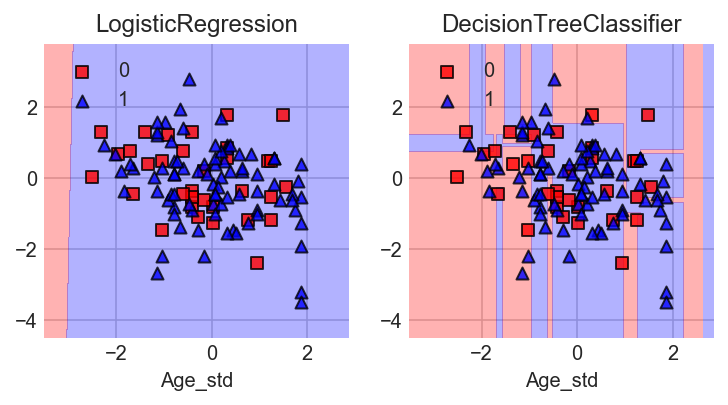

In [14]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Decision-Tree

Data structure consisting of a hierarchy of nodes

## Node

question or prediction

## Root

_no_ parent node, question giving rise to _two_ children nodes

## Internal node

_one_ parent node, question giving rise to _two_ children nodes

## Leaf

_one_ parent node, _no_ children nodes. This is where predictions are made

## Information Gain (IG)

How does the algorithm know which feature and which split-point to choose? It does so by maximizing information gain. The tree considers that each node contains information and aims at maximizing the information gain after each split. 

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.
- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- When an internal node is split, the split is performed in such a way so that information gain is maximized.

In [15]:
breast_cancer = pd.read_csv('wbc.csv', index_col=0)

In [16]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
y = breast_cancer.diagnosis

In [18]:
mapping = {'M':1, 'B':0}

In [19]:
y = y.map(mapping)

In [20]:
X = breast_cancer.drop('diagnosis', axis=1)

In [21]:
X = X.iloc[:, :30]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se      

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [24]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [25]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

y_pred_g = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_pred_g, y_test)

In [26]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


# [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Decision tree for regression
```python
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
```

In [27]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

The target variable needs to be continuous in a regression problem. Therefore, the outcome of the model will be a *real number*.

In [28]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.1,
                          random_state=3)

#Fit 'dt' to the training-set
dt.fit(X_train, y_train)

#Predict test-set labels
y_pred = dt.predict(X_test)

In [29]:
#Compute test-set MSE
mse_dt = MSE(y_test, y_pred)

#Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print(rmse_dt)

0.2637620950775572


<img src="https://schellenbergers3bucket.s3-us-west-2.amazonaws.com/Info+Criterion+for+Regression-Tree.png" width="100%" alt="Info Criterion for Regression-Tree.png">

In [30]:
auto = pd.read_csv("auto.csv")
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [31]:
auto_encoded = pd.get_dummies(auto)
auto_encoded.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [32]:
X = auto_encoded.drop(columns='mpg')

In [33]:
print(X)

     displ   hp  weight  accel  size  origin_Asia  origin_Europe  origin_US
0    250.0   88    3139   14.5  15.0            0              0          1
1    304.0  193    4732   18.5  20.0            0              0          1
2     91.0   60    1800   16.4  10.0            1              0          0
3    250.0   98    3525   19.0  15.0            0              0          1
4     97.0   78    2188   15.8  10.0            0              1          0
..     ...  ...     ...    ...   ...          ...            ...        ...
387  250.0   88    3021   16.5  15.0            0              0          1
388  151.0   90    2950   17.3  10.0            0              0          1
389   98.0   68    2135   16.6  10.0            1              0          0
390  250.0  110    3520   16.4  15.0            0              0          1
391  140.0   88    2720   15.4  10.0            0              0          1

[392 rows x 8 columns]


In [34]:
y = auto_encoded['mpg']
print(y)

0      18.0
1       9.0
2      36.1
3      18.5
4      34.3
       ... 
387    18.0
388    27.0
389    29.5
390    17.5
391    25.1
Name: mpg, Length: 392, dtype: float64


In [35]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=3)

In [36]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [37]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


# Compare to linear regression
After instantiating a linear model and fitting our test set to the our new `lr` linear regression model, we can compare the root mean squared errors of the two predictions:

```Python
# Predict test set labels 
y_pred_lr = dt.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))
```

Output:

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37

Therefore we have demonstrably lower error by using a tree regressor.

# Generalization Error
## Goals of Supervised Learning

- Find a model $\hat{f}$ that best approximates $f:\hat{f} \approx f$
- $\hat{f}$ can be Logistic Regression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- **End goal:** $\hat{f}$ should acheive a low predictive error on unseen datasets.

## Difficulties in Approximating $f$

- **Overfitting:** $\hat{f}(x)$ fits the training set noise.
- **Underfitting:** $\hat{f}$ is not flexible enough to approximate $f$.

## Generalization Error
- **Generalization Error of** $\hat{f}$: Does $\hat{f}$ generalize well on unseen data?
- It can be decomposed as follows: Generalization Error of $\hat{f} = bias^2 + variance + \text{irreducible error}$
    - Where the irreducible error is the error contribution from noise.
    
## Bias
- **Bias:** error term that tells you, on average, how much $\hat{f} \neq f$.
- High bias models lead to underfitting

## Variance
- **Variance:** tells you how much $\hat{f}$ is inconsistent over different training sets.
- High variance models lead to overfitting

## Model Complexity
- **Model Complexity:** sets the flexibility of $\hat{f}$.
- Example: Maximum tree depth, Minimum samples per leaf, ...

## Bias - Variance Trade-off
<img src="https://www.dataquest.io/wp-content/uploads/2019/01/biasvariance.png" alt="Bias Variance Tradeoff" width="100%">
<img src="https://alinguistinfrance.files.wordpress.com/2017/09/screen-shot-2017-09-15-at-17-27-53.png?w=1024" alt="Bias Variance Target Visual" width="100%">

# Estimating the Generalization Error
- How do we estimate the generalization error of a model?
- Cannot be done directly because:
    - $f$ is unknown,
    - usually you only have one dataset,
    - noise is unpredictable

## Solution:
- split the data to training and test sets,
- fit $\hat{f}$ to the training set,
- evaluate the error of $\hat{f}$ on the unseen test set.
- generalization error of $\hat{f} \approx \text{test set error of} \hat{f}$.

## Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are confident about $\hat{f}$'s performance.
- Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points.
- Solution --> Cross-Validation (CV):
    - K-Fold CV,
    - Hold-Out CV.

# Diagnose Variance Problems
- If $\hat{f}$ suffers from **high variance**: CV error of $\hat{f}$ > training set error of $\hat{f}$.
- $\hat{f}$ is said to over fit the training set. To remedy overfitting:
    - decrease model complexity,
    - for example: decrease max depth, increase min samples per leaf, etc.
    - gather more data, etc.
    
# Diagnose Bias Problems
- if $\hat{f}$ suffers from **high bias**: CV error of $\hat{f}$ $\approx$ training set error of $\hat{f}$ >> desired error.
- $\hat{f}$ is said to underfit the training set. to remedy underfitting:
    - increase model complexity
    - for example: increase max depth, decrese min samples per leaf, etc.
    - gather more relevant features
    
```Python
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=0.3,
                                                  random_state=SEED)
# Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.14,
                          random_state=SEED)

# Evaluate the list of MSE obtained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = cross_val_score(dt, X_train, y_train, cv=10, scoring ='neg_mean_squared_error', n_jobs = -1)

# You can multiply the result by -1 to obtain an array of the cross-validation MSEs
#Fit 'dt' to the training-set
dt.fit(X_train, y_train)

#Predict training-set labels
y_pred_train = dt.predict(X_train)

#Predict test-set labels
y_pred_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))
```

In [38]:
print(X)
print(y)

     displ   hp  weight  accel  size  origin_Asia  origin_Europe  origin_US
0    250.0   88    3139   14.5  15.0            0              0          1
1    304.0  193    4732   18.5  20.0            0              0          1
2     91.0   60    1800   16.4  10.0            1              0          0
3    250.0   98    3525   19.0  15.0            0              0          1
4     97.0   78    2188   15.8  10.0            0              1          0
..     ...  ...     ...    ...   ...          ...            ...        ...
387  250.0   88    3021   16.5  15.0            0              0          1
388  151.0   90    2950   17.3  10.0            0              0          1
389   98.0   68    2135   16.6  10.0            1              0          0
390  250.0  110    3520   16.4  15.0            0              0          1
391  140.0   88    2720   15.4  10.0            0              0          1

[392 rows x 8 columns]
0      18.0
1       9.0
2      36.1
3      18.5
4      34.3
    

In [39]:
# Intantiate the model

# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

In [40]:
# import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


`A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.`

In [41]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


- `dt` suffers from high bias because `RMSE_CV` $\approx$ `RMSE_train` and both scores are greater than `baseline_RMSE`

- `dt` is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

# Ensemble Learning

## Advantages of CARTs (Classification And Regression Trees)
- Simple to understand
- Simple to interpret
- Easy to use
- Flexibility: ability to describe non-linear dependencies.
- Preprocessing: no need to standardize or normalize features, etc.

## Limitations of CARTs
- Classification: can only produce orthogonal decision boundaries
- Sensitive to small variations in the training set
- High variance: unconstrained CARTs may overfit the training set
- Solution: ensemble learning

# Ensemble
- Train different models on the same dataset
- Let each model make its predictions
- Met-model: aggregates predictions of individual models
- Final prediction: more robust and less prone to errors
- Best results: models are skillful in different ways.

## Voting Classifier
- Binary classification task
- N classifiers make predictions: $P_{1},P_{2},\cdots,P_{N} \text{with } P_{i} = 0\text{ or }1$
- Meta-model prediction: hard voting.

<img src="https://www.lucidchart.com/publicSegments/view/0cfbfe59-44d9-4508-b300-e3f3c2990b99/image.png" width="100%" alt="Hard Voting Visual Description">

# Voting Classifier in sklearn (Breast-Cancer dataset)

In [42]:
# Import functions to compute accuracy and split data

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

In [43]:
b_cancer = pd.read_csv("wbc.csv")
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
X = b_cancer.drop(columns=["id", "diagnosis"])
X = X.iloc[:,:30]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [46]:
y = b_cancer["diagnosis"]
print(y)
print("\n\nUnique Values in Series: \n", y.unique())

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Unique Values in Series: 
 ['M' 'B']


In [47]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED, max_iter=10000)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

In [48]:
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]

In [49]:
# Iterate over the dfined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.947
K Nearest Neighbours : 0.930
Classification Tree : 0.930


In [50]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.953


In [53]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED, max_iter=10000)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [54]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.947
K Nearest Neighbours : 0.912
Classification Tree : 0.854


In [55]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)    

# Fit vc to the training set
vc.fit(X_train, y_train) 

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.918


# Bagging (Bootstrap Aggregation)
## Ensemble Methods
### Voting Classifier
- same training set,
- $\neq$ algorithms (using different algorithms)
### Bagging
- one or same algorithm
- $\neq$ subsets of the training set (trained on different subsets of the training data)

- Uses a technique known as the bootstrap
- Reduces variance of individual models in the ensemble

<img src="https://www.lucidchart.com/publicSegments/view/443a42fa-6b0d-497b-9ab1-c5e59f13f3bb/image.png" width=100% alt="Bootstrap Method Visualization">

### Bagging Training 

<img src="https://www.lucidchart.com/publicSegments/view/2707f4d3-0f61-4f25-ac09-8d077e849541/image.png" width=100% alt="Bagging Training Visualization">

### Bagging Prediction

<img src="https://www.lucidchart.com/publicSegments/view/e6a62f9e-f878-4d27-9c43-7ab54f988d47/image.png" width=100% alt="Bagging Prediction Visualization">

# Bagging: Classification & Regression
## Classification:
- Aggregates predictions by majority voting
- `Bagging Classifier` in scikit-learn
